# Fits Test
This is basically a dump file for me to test out how to handle FITS files. Carry on.

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
#POPPY
import poppy
from poppy.poppy_core import PlaneType

### Investigating Clay Primary Mirror FITS File

In [127]:
m1 = fits.open('data/ClayM1_0mask_meters.fits')
m1[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.8          
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  233 /                                                
NAXIS2  =                  233 /                                                
EXTEND  =                    T /Extensions may be present                       

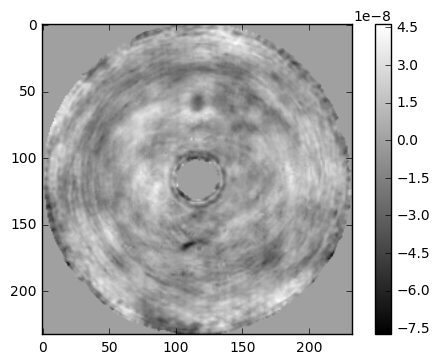

In [128]:
plt.imshow(m1[0].data, cmap='gray')
plt.colorbar()

#### Adding in PUPLSCAL and BUNIT header card values, write to new file

In [153]:
puplscal = 6.5/m1[0].shape[0]
m1[0].header.set('PUPLSCAL', puplscal)
m1[0].header.comments['PUPLSCAL'] = "pixel scale [m/pix]"
m1[0].header.set('BUNIT', "m")
m1[0].header.comments['BUNIT'] = 'OPD Units'
m1[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.8          
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  233 /                                                
NAXIS2  =                  233 /                                                
EXTEND  =                    T /Extensions may be present                       
PUPLSCAL=  0.02789699570815451 / pixel scale [m/pix]                            
BUNIT   = 'm       '           / OPD Units                                      

In [131]:
m1.writeto('data/ClayM1_0mask_meters_new.fits')

#### Verify that new primary mirror file has new headers

In [132]:
new_m1 = fits.open('data/ClayM1_0mask_meters_new.fits')
new_m1[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.8          
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  233 /                                                
NAXIS2  =                  233 /                                                
EXTEND  =                    T /Extensions may be present                       
PUPLSCAL=  0.02789699570815451 / pixel scale [m/pix]                            
BUNIT   = 'm       '           / OPD Units                                      

Checks out!

### Trying to check what is wrong with OAP-0 FITS file.

In [141]:
oap0_fits = fits.open('data/oap_HP_0.fits')
oap0_fits[0].header

 [astropy.io.fits.verify]


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  256 / length of data axis 1                          
NAXIS2  =                  256 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BUNIT   = 'nm      '           / OPD units                                      
PUPLSCAL=           0.00015625 / pixel scale [m/pix]                            
PIXSCALE=           0.00015625 / pixel scale [m/pix]                            
OPTICD  =                 0.04 / Optic diameter [m]                             
ALPHA   =                 1.

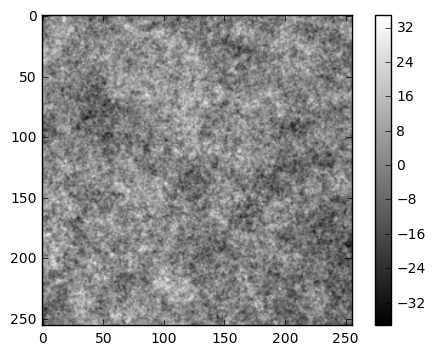

In [142]:
plt.imshow(oap0_fits[0].data, cmap='gray')
plt.colorbar()

#### Attempt 1: Open FITS file, Try to edit BUNIT card and use header.set() method to overwrite BUNIT value to "nm"

In [158]:
oap0_test1 = fits.open('data/oap_HP_0.fits')
oap0_test1.info()

Filename: data/oap_HP_0.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      17   (256, 256)   float64   


In [159]:
oap0_test1[0].header.set('BUNIT', 'nm')
oap0_test1[0].header

 [astropy.io.fits.verify]


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  256 / length of data axis 1                          
NAXIS2  =                  256 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BUNIT   = 'nm      '           / OPD units                                      
PUPLSCAL=           0.00015625 / pixel scale [m/pix]                            
PIXSCALE=           0.00015625 / pixel scale [m/pix]                            
OPTICD  =                 0.04 / Optic diameter [m]                             
ALPHA   =                 1.

Hmmm, it still got angry. I wonder why.

#### Attempt 2: Open FITS file, Try to edit BUNIT card immediatelym and set to "nanometers"

In [154]:
oap0_test2 = fits.open('data/oap_HP_0.fits')
oap0_test2.info()

Filename: data/oap_HP_0.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      17   (256, 256)   float64   


In [155]:
oap0_test2[0].header.set('BUNIT', 'nanometers')
oap0_test2[0].header

 [astropy.io.fits.verify]


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  256 / length of data axis 1                          
NAXIS2  =                  256 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BUNIT   = 'nm      '           / OPD units                                      
PUPLSCAL=           0.00015625 / pixel scale [m/pix]                            
PIXSCALE=           0.00015625 / pixel scale [m/pix]                            
OPTICD  =                 0.04 / Optic diameter [m]                             
ALPHA   =                 1.

Still no luck! 

<b>Final Decision</b>: Don't use BUNIT, manually input OPD units into code.

### Investigating Pupil FITS file

In [48]:
pupil = fits.open('data/MagAOX_f11_pupil_256_unmasked.fits')
pupil.info()

Filename: data/MagAOX_f11_pupil_256_unmasked.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      13   (256, 256)   float32   


In [49]:
pupil[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  256 / length of data axis 1                          
NAXIS2  =                  256 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
PUPLSCAL=           0.02539062 / pixel scale [m/pixel]                          
PUPILD  =                  6.5 / Physical diameter of pupil image [m]           
SPIDERHW=              0.01905 / Half-width of spiders [m]                      
HIERARCH CENOBSRAT =      0.29 / central obscuration ratio                      
OMASKRAT=                   

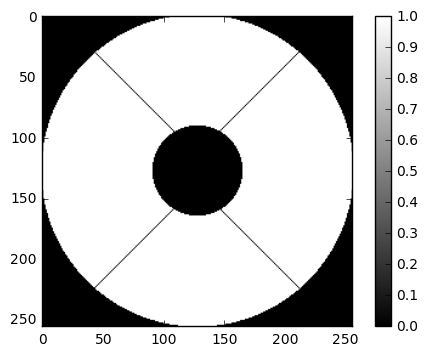

In [33]:
plt.imshow(pupil[0].data, cmap='gray')
plt.colorbar()

### Investigating Masked Pupil FITS file

In [46]:
pupilmasked = fits.open('data/MagAOX_f11_pupil_400_masked.fits')
pupilmasked[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  400 / length of data axis 1                          
NAXIS2  =                  400 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
PUPLSCAL=              0.01625 / pixel scale [m/pixel]                          
PUPILD  =                  6.5 / Physical diameter of pupil image [m]           
SPIDERHW=                0.068 / Half-width of spiders [m]                      
HIERARCH CENOBSRAT =      0.31 / central obscuration ratio                      
OMASKRAT=                0.9

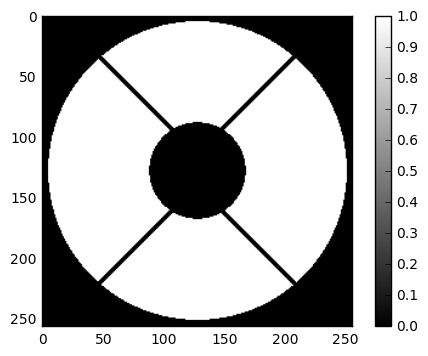

In [44]:
plt.imshow(pupilmasked[0].data, cmap='gray')
plt.colorbar()

## Trying to open a wavefront FITS file generated by calc_PSF at F/69 science plane

In [2]:
wfs = fits.open('wavefront_plane_065.fits')
wfs[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 1536                                                  
NAXIS2  =                 1536                                                  
NAXIS3  =                    3                                                  
EXTEND  =                    T                                                  
PLANE1  = 'Wavefront Intensity'                                                 
PLANE2  = 'Wavefront Amplitude'                                                 
PLANE3  = 'Wavefront Phase'                                                     
WAVELEN = 6.56000000000000E-07 / Wavelength in meters                           
DIFFLMT =  0.02088625984934805 / Diffraction limit lambda/D in arcsec           
OVERSAMP=                   

In [3]:
wfs.info()

Filename: wavefront_plane_065.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     370   (1536, 1536, 3)   float64   


In [4]:
image_data = wfs[0].data

In [5]:
type(image_data)

numpy.ndarray

In [6]:
image_data.shape

(3, 1536, 1536)

In [11]:
amplitude = image_data[1,:,:]

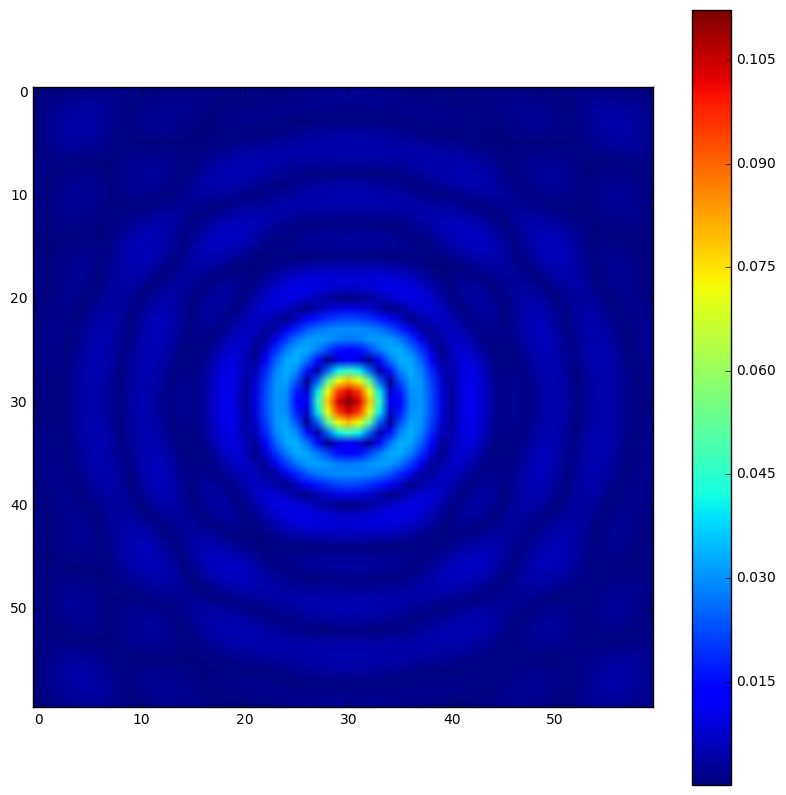

In [24]:
plt.figure(figsize=[10,10])
plt.imshow(amplitude[738:798,738:798])
plt.colorbar()

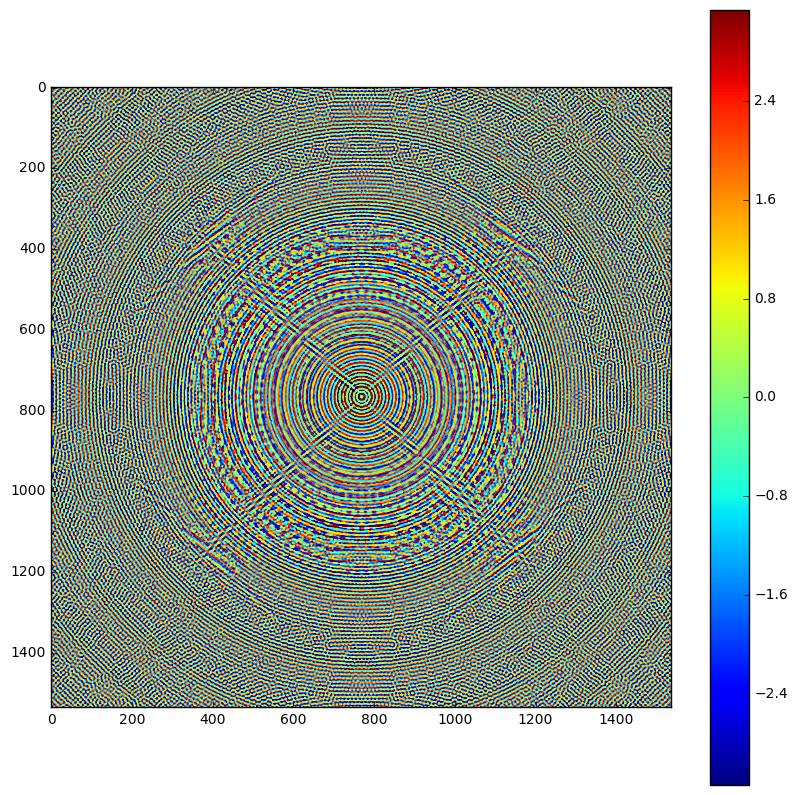

In [17]:
plt.figure(figsize=[10,10])
phase = image_data[2,:,:]
plt.imshow(phase)
plt.colorbar()

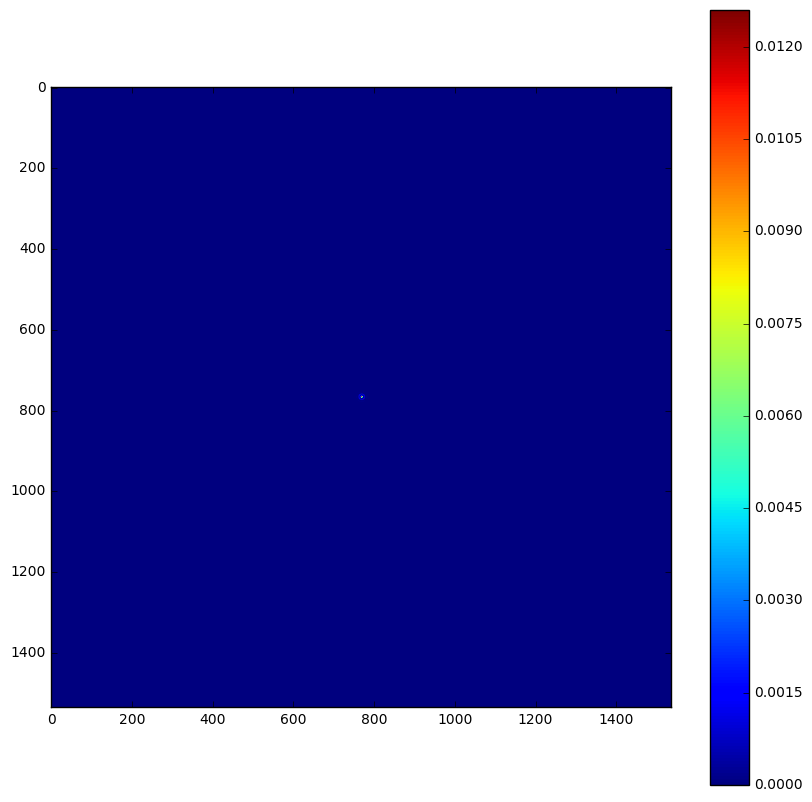

In [18]:
plt.figure(figsize=[10,10])
intensity = image_data[0,:,:]
plt.imshow(intensity)
plt.colorbar()

In [78]:
wftest=fits.open('wavefront_plane_065.fits')
headermain=fits.getheader('wavefront_plane_065.fits')

In [79]:
headermain

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 1536                                                  
NAXIS2  =                 1536                                                  
NAXIS3  =                    3                                                  
EXTEND  =                    T                                                  
PLANE1  = 'Wavefront Intensity'                                                 
PLANE2  = 'Wavefront Amplitude'                                                 
PLANE3  = 'Wavefront Phase'                                                     
WAVELEN = 6.56000000000000E-07 / Wavelength in meters                           
DIFFLMT =  0.02088625984934805 / Diffraction limit lambda/D in arcsec           
OVERSAMP=                   

In [84]:
newholder=fits.PrimaryHDU(data=wftest[0].data[1,:,:],header=headermain)
newholder.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1536                                                  
NAXIS2  =                 1536                                                  
PLANE1  = 'Wavefront Intensity'                                                 
PLANE2  = 'Wavefront Amplitude'                                                 
PLANE3  = 'Wavefront Phase'                                                     
WAVELEN = 6.56000000000000E-07 / Wavelength in meters                           
DIFFLMT =  0.02088625984934805 / Diffraction limit lambda/D in arcsec           
OVERSAMP=                    3 / Oversampling factor for FFTs in computation    
DET_SAMP=                    3 / Oversampling factor for MFT to detector plane  
PIXELSCL= 1.05861583581023E-

In [85]:
newholder.header.remove('plane1')
newholder.header.remove('plane3')
newholder.header.rename_keyword('plane2','plane1')
newholder.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1536                                                  
NAXIS2  =                 1536                                                  
PLANE1  = 'Wavefront Amplitude'                                                 
WAVELEN = 6.56000000000000E-07 / Wavelength in meters                           
DIFFLMT =  0.02088625984934805 / Diffraction limit lambda/D in arcsec           
OVERSAMP=                    3 / Oversampling factor for FFTs in computation    
DET_SAMP=                    3 / Oversampling factor for MFT to detector plane  
PIXELSCL= 1.05861583581023E-05 / Pixel scale in meters/pixel                    
DIAM    =             6.478408 / Pupil diameter in meters (not incl padding)    
HISTORY Created wavefront: w

In [86]:
newholder.writeto('f69scifp_WithoutAberration_Amplitude.fits')

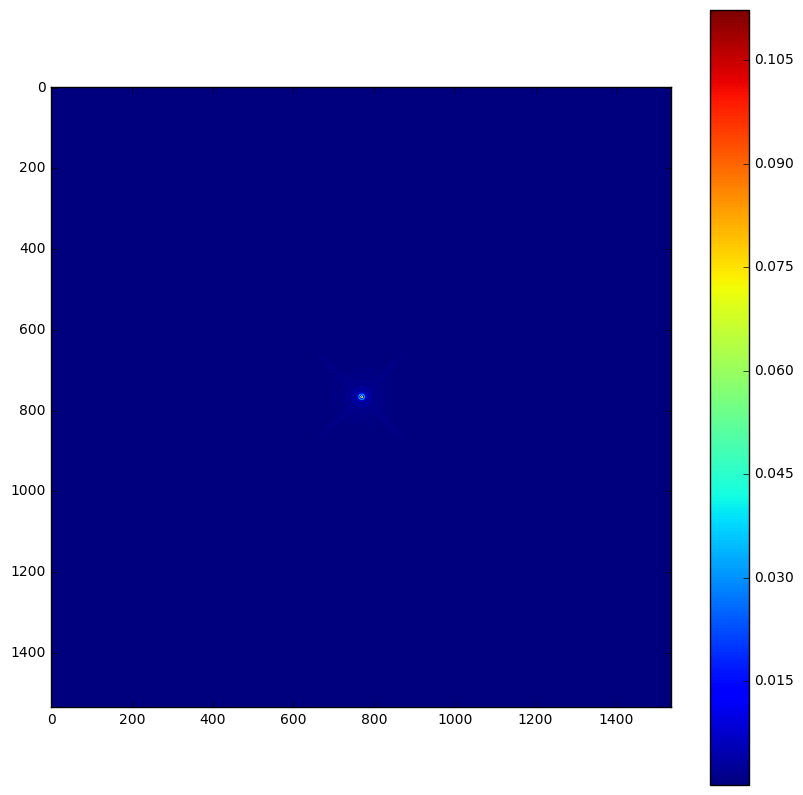

In [87]:
checkfits=fits.open('f69scifp_WithoutAberration_Amplitude.fits')
plt.figure(figsize=[10,10])
plt.imshow(checkfits[0].data)
plt.colorbar()